LOAD AND EXPLORE THE DATASET

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("SNT_dataset.csv")

In [3]:
df.sample(5)

,timestamp,datapath_id,flow_id,ip_src,tp_src,ip_dst,tp_dst,ip_proto,icmp_code,icmp_type,...,idle_timeout,hard_timeout,flags,packet_count,byte_count,packet_count_per_second,packet_count_per_nsecond,byte_count_per_second,byte_count_per_nsecond,label
222364,1.724442e+09,2,10.0.0.133471610.0.0.1806,10.0.0.13,34716,10.0.0.1,80,6,0,8,...,20,100,0,60,4557,6.666667,3.260870e-07,506.333333,0.000025,0
807442,1.724494e+09,3,173.72.248.24532910.0.0.14017,173.72.248.2,45329,10.0.0.14,0,17,-1,-1,...,20,100,0,0,0,0.000000,0.000000e+00,0.000000,0.000000,1
170310,1.724438e+09,1,10.0.0.18010.0.0.5527946,10.0.0.1,80,10.0.0.5,52794,6,0,0,...,20,100,0,408,6027132,40.800000,4.176049e-07,602713.200000,0.006169,0
763975,1.724494e+09,5,220.5.235.904153410.0.0.14017,220.5.235.90,41534,10.0.0.14,0,17,-1,-1,...,20,100,0,0,0,0.000000,0.000000e+00,0.000000,0.000000,1
707462,1.724494e+09,1,91.141.209.86010.0.0.1401,91.141.209.86,0,10.0.0.14,0,1,0,8,...,20,100,0,0,0,0.000000,0.000000e+00,0.000000,0.000000,1


In [4]:
df.shape

(1034668, 22)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1034668 entries, 0 to 1034667
Data columns (total 22 columns):
 #   Column                    Non-Null Count    Dtype  
---  ------                    --------------    -----  
 0   timestamp                 1034668 non-null  float64
 1   datapath_id               1034668 non-null  int64  
 2   flow_id                   1034668 non-null  object 
 3   ip_src                    1034668 non-null  object 
 4   tp_src                    1034668 non-null  int64  
 5   ip_dst                    1034668 non-null  object 
 6   tp_dst                    1034668 non-null  int64  
 7   ip_proto                  1034668 non-null  int64  
 8   icmp_code                 1034668 non-null  int64  
 9   icmp_type                 1034668 non-null  int64  
 10  flow_duration_sec         1034668 non-null  int64  
 11  flow_duration_nsec        1034668 non-null  int64  
 12  idle_timeout              1034668 non-null  int64  
 13  hard_timeout              1

In [6]:
df.duplicated().sum()

0

In [7]:
df.head()

,timestamp,datapath_id,flow_id,ip_src,tp_src,ip_dst,tp_dst,ip_proto,icmp_code,icmp_type,...,idle_timeout,hard_timeout,flags,packet_count,byte_count,packet_count_per_second,packet_count_per_nsecond,byte_count_per_second,byte_count_per_nsecond,label
0,1.724424e+09,2,10.0.0.1010.0.0.901,10.0.0.1,0,10.0.0.9,0,1,0,0,...,20,100,0,1,98,0.333333,2.262443e-09,32.666667,2.217195e-07,0
1,1.724424e+09,2,10.0.0.18010.0.0.9559166,10.0.0.1,80,10.0.0.9,55916,6,0,0,...,20,100,0,5,569,5.000000,1.582278e-08,569.000000,1.800633e-06,0
2,1.724424e+09,2,10.0.0.18010.0.0.9559186,10.0.0.1,80,10.0.0.9,55918,6,0,0,...,20,100,0,1,66,0.000000,0.000000e+00,0.000000,0.000000e+00,0
3,1.724424e+09,2,10.0.0.18010.0.0.9559146,10.0.0.1,80,10.0.0.9,55914,6,0,0,...,20,100,0,95,818057,47.500000,1.923077e-07,409028.500000,1.655986e-03,0
4,1.724424e+09,2,10.0.0.98010.0.0.1559141,10.0.0.9,80,10.0.0.1,55914,1,0,8,...,20,100,0,1,98,0.333333,2.036660e-09,32.666667,1.995927e-07,0


In [8]:
# Drop unnecessary columns (e.g., timestamp, flow_id, ip_src, ip_dst)
df = df.drop(columns=['timestamp', 'flow_id', 'ip_src', 'ip_dst'])

In [9]:
df.isnull().sum()

datapath_id                 0
tp_src                      0
tp_dst                      0
ip_proto                    0
icmp_code                   0
icmp_type                   0
flow_duration_sec           0
flow_duration_nsec          0
idle_timeout                0
hard_timeout                0
flags                       0
packet_count                0
byte_count                  0
packet_count_per_second     0
packet_count_per_nsecond    0
byte_count_per_second       0
byte_count_per_nsecond      0
label                       0
dtype: int64

In [10]:
#ENCODING CATEGORICAL FEATURES

In [11]:
from sklearn.preprocessing import LabelEncoder
label_encoders = {}
for column in df.select_dtypes(include=['object']).columns:
    label_encoders[column] = LabelEncoder()
    df[column] = label_encoders[column].fit_transform(df[column])

In [12]:
from sklearn.preprocessing import StandardScaler  # Import StandardScaler

# Normalize numerical columns
scaler = StandardScaler()
X = scaler.fit_transform(df.drop(columns=['label']))  # Features
y = df['label'].values  # Target variable

In [13]:
df.head()

,datapath_id,tp_src,tp_dst,ip_proto,icmp_code,icmp_type,flow_duration_sec,flow_duration_nsec,idle_timeout,hard_timeout,flags,packet_count,byte_count,packet_count_per_second,packet_count_per_nsecond,byte_count_per_second,byte_count_per_nsecond,label
0,2,0,0,1,0,0,3,442000000,20,100,0,1,98,0.333333,2.262443e-09,32.666667,2.217195e-07,0
1,2,80,55916,6,0,0,1,316000000,20,100,0,5,569,5.000000,1.582278e-08,569.000000,1.800633e-06,0
2,2,80,55918,6,0,0,0,246000000,20,100,0,1,66,0.000000,0.000000e+00,0.000000,0.000000e+00,0
3,2,80,55914,6,0,0,2,494000000,20,100,0,95,818057,47.500000,1.923077e-07,409028.500000,1.655986e-03,0
4,2,80,55914,1,0,8,3,491000000,20,100,0,1,98,0.333333,2.036660e-09,32.666667,1.995927e-07,0


In [14]:
#provides a statistical summary of the numerical columns in dataset.
df.describe()

,datapath_id,tp_src,tp_dst,ip_proto,icmp_code,icmp_type,flow_duration_sec,flow_duration_nsec,idle_timeout,hard_timeout,flags,packet_count,byte_count,packet_count_per_second,packet_count_per_nsecond,byte_count_per_second,byte_count_per_nsecond,label
count,1.034668e+06,1.034668e+06,1.034668e+06,1.034668e+06,1.034668e+06,1.034668e+06,1.034668e+06,1.034668e+06,1034668.0,1034668.0,1034668.0,1.034668e+06,1.034668e+06,1.034668e+06,1.034668e+06,1.034668e+06,1.034668e+06,1.034668e+06
mean,2.960291e+00,1.728997e+04,1.103834e+04,5.976781e+00,-2.875647e-01,3.374178e+00,1.837536e+01,4.930915e+08,20.0,100.0,0.0,5.804870e+01,1.519725e+05,8.661323e+00,4.294538e-07,2.689572e+04,1.087725e-03,4.901021e-01
std,1.431378e+00,2.137769e+04,2.034501e+04,5.838918e+00,4.526273e-01,4.265729e+00,2.190204e+01,2.910212e+08,0.0,0.0,0.0,6.539803e+03,1.361687e+06,1.412138e+03,7.437498e-05,3.332585e+05,3.505582e-02,4.999023e-01
min,1.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,-1.000000e+00,-1.000000e+00,0.000000e+00,0.000000e+00,20.0,100.0,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,-1.000000e+00,-1.000000e+00,5.000000e+00,2.380000e+08,20.0,100.0,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,3.000000e+00,8.000000e+01,8.000000e+01,6.000000e+00,0.000000e+00,0.000000e+00,1.200000e+01,4.900000e+08,20.0,100.0,0.0,1.000000e+00,6.600000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
75%,4.000000e+00,3.992100e+04,8.000000e+01,6.000000e+00,0.000000e+00,8.000000e+00,1.800000e+01,7.460000e+08,20.0,100.0,0.0,1.800000e+01,2.254000e+03,5.000000e-01,5.000000e-08,5.196970e+01,5.906849e-06,1.000000e+00
max,6.000000e+00,6.553500e+04,6.099800e+04,1.700000e+01,0.000000e+00,8.000000e+00,1.000000e+02,9.990000e+08,20.0,100.0,0.0,2.661668e+06,4.311902e+08,1.336376e+06,4.435977e-02,2.164929e+08,7.186282e+00,1.000000e+00


<Axes: xlabel='label', ylabel='count'>

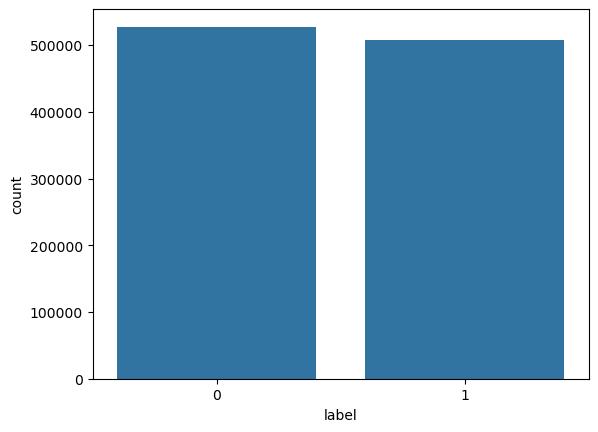

In [15]:
import seaborn as sns
sns.countplot(x=df['label'])

In [16]:
# percentage of all labels
total_labels = len(df)
label_counts = df['label'].value_counts()
for label, count in label_counts.items():
  percentage = (count / total_labels) * 100
  print(f"{label}: {percentage:.5f}%")


0: 50.98979%
1: 49.01021%


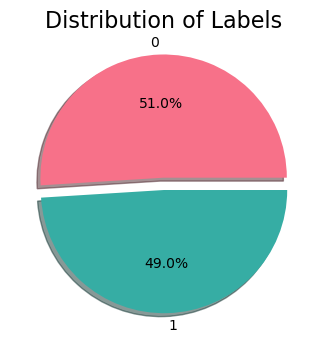

In [17]:
# pie chart for the above for good visibility
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 4))
labels = df['label'].value_counts().index.to_list()
colors = sns.color_palette('husl', len(labels))
explode = [0.1] + [0] * (len(labels) - 1)
plt.pie(df['label'].value_counts(), explode=explode, labels=labels, autopct='%1.1f%%', shadow=True, colors=colors)
plt.title('Distribution of Labels', fontsize=16)
plt.show()

In [18]:
#SPLITTING FEATURES AND LABELS

In [19]:
from sklearn.model_selection import train_test_split

# Assuming the last column is the target variable
##y = df.iloc[:, -1].values   # Target (dependent variable)

# Split dataset into training (80%) and testing (20%) sets
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [20]:
# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [21]:
# Reshape for LSTM and CNN (required for 3D input format)
X_train_reshaped = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test_reshaped = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

In [22]:
 X_train.shape

(827734, 17)

In [23]:
X_test.shape

(206934, 17)

In [24]:
y_train.shape

(827734,)

In [25]:
y_test.shape

(206934,)

In [26]:
#This ensures that class distribution is similar in both training and testing sets
import numpy as np

unique_train, counts_train = np.unique(y_train, return_counts=True)
unique_test, counts_test = np.unique(y_test, return_counts=True)

print("Class distribution in y_train:", dict(zip(unique_train, counts_train)))
print("Class distribution in y_test:", dict(zip(unique_test, counts_test)))


Class distribution in y_train: {0: 422255, 1: 405479}
Class distribution in y_test: {0: 105320, 1: 101614}


In [28]:
!pip install tensorflow

LSTM (Long short Term Memory) Model

In [29]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

# Define LSTM Model
lstm_model = Sequential([
    LSTM(128, return_sequences=True, input_shape=(X_train.shape[1], 1)),
    LSTM(64),
    Dense(32, activation='relu'),
    Dropout(0.3),
    Dense(1, activation='sigmoid')  # Binary classification
])

# Compile model
lstm_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Summary
lstm_model.summary()

C:\Users\chawh\anaconda3\anaconda\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 17, 128)             │          66,560 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ (None, 64)                  │          49,408 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 118,081 (461.25 KB)

 Trainable params: 118,081 (461.25 KB)

 Non-trainable params: 0 (0.00 B)

In [30]:
# Train the model
lstm_model.fit(X_train, y_train, epochs=5, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/5
25867/25867 ━━━━━━━━━━━━━━━━━━━━ 439s 17ms/step - accuracy: 0.9657 - loss: 0.0959 - val_accuracy: 0.9942 - val_loss: 0.0234
Epoch 2/5
25867/25867 ━━━━━━━━━━━━━━━━━━━━ 421s 16ms/step - accuracy: 0.9939 - loss: 0.0264 - val_accuracy: 0.9941 - val_loss: 0.0233
Epoch 3/5
25867/25867 ━━━━━━━━━━━━━━━━━━━━ 424s 16ms/step - accuracy: 0.9946 - loss: 0.0231 - val_accuracy: 0.9949 - val_loss: 0.0229
Epoch 4/5
25867/25867 ━━━━━━━━━━━━━━━━━━━━ 429s 17ms/step - accuracy: 0.9949 - loss: 0.0225 - val_accuracy: 0.9952 - val_loss: 0.0213
Epoch 5/5
25867/25867 ━━━━━━━━━━━━━━━━━━━━ 432s 17ms/step - accuracy: 0.9950 - loss: 0.0220 - val_accuracy: 0.9953 - val_loss: 0.0213


In [31]:
# Predict probabilities for the test set
y_pred_probs = lstm_model.predict(X_test)

# Convert probabilities to binary class (0 or 1) using threshold 0.5
y_pred = (y_pred_probs > 0.5).astype(int)


6467/6467 ━━━━━━━━━━━━━━━━━━━━ 43s 7ms/step


In [32]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Calculate Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy:.4f}")

# Display Classification Report
print("Classification Report:\n", classification_report(y_test, y_pred))

# Display Confusion Matrix
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))


Model Accuracy: 0.9953
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.99      1.00    105320
           1       0.99      1.00      1.00    101614

    accuracy                           1.00    206934
   macro avg       1.00      1.00      1.00    206934
weighted avg       1.00      1.00      1.00    206934

Confusion Matrix:
 [[104358    962]
 [    17 101597]]


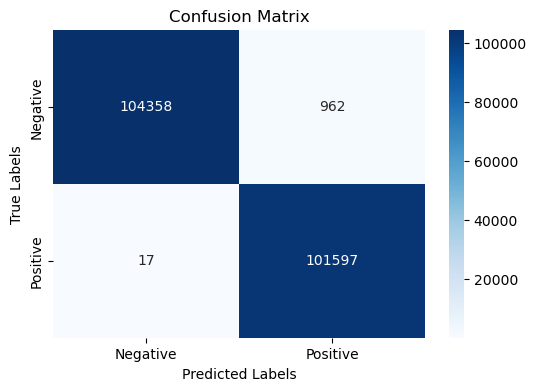

In [33]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Compute Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

# Plot Confusion Matrix
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()


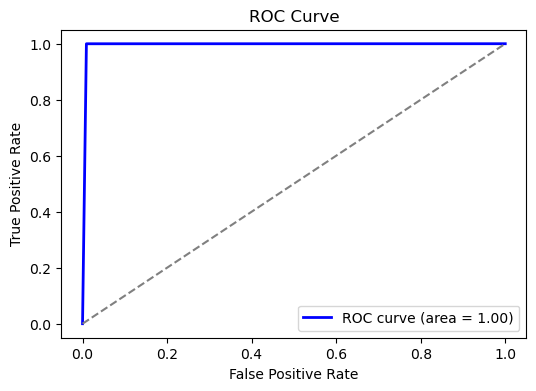

In [34]:
from sklearn.metrics import roc_curve, auc

# Compute ROC curve
fpr, tpr, _ = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

# Plot ROC Curve
plt.figure(figsize=(6,4))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Random chance line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()


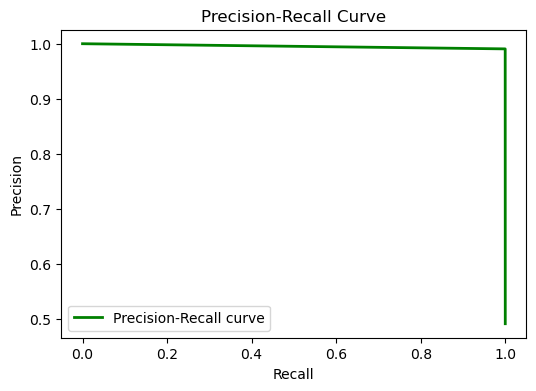

In [35]:
from sklearn.metrics import precision_recall_curve

# Compute Precision-Recall curve
precision, recall, _ = precision_recall_curve(y_test, y_pred)

# Plot Precision-Recall Curve
plt.figure(figsize=(6,4))
plt.plot(recall, precision, color='green', lw=2, label='Precision-Recall curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc='best')
plt.show()


MLP (Multi Layer Perceptron) Model

In [36]:
# MLP Model
mlp_model = Sequential([
    Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(64, activation='relu'),
    Dropout(0.3),
    Dense(1, activation='sigmoid')
])

mlp_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

C:\Users\chawh\anaconda3\anaconda\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [37]:
# Train the model
mlp_model.fit(X_train, y_train, epochs=5, batch_size=32, validation_data=(X_test, y_test))


Epoch 1/5
25867/25867 ━━━━━━━━━━━━━━━━━━━━ 51s 2ms/step - accuracy: 0.9927 - loss: 0.0443 - val_accuracy: 0.9949 - val_loss: 0.0308
Epoch 2/5
25867/25867 ━━━━━━━━━━━━━━━━━━━━ 51s 2ms/step - accuracy: 0.9951 - loss: 0.0220 - val_accuracy: 0.9951 - val_loss: 0.0320
Epoch 3/5
25867/25867 ━━━━━━━━━━━━━━━━━━━━ 51s 2ms/step - accuracy: 0.9953 - loss: 0.0231 - val_accuracy: 0.9951 - val_loss: 0.0214
Epoch 4/5
25867/25867 ━━━━━━━━━━━━━━━━━━━━ 52s 2ms/step - accuracy: 0.9952 - loss: 0.0217 - val_accuracy: 0.9952 - val_loss: 0.0213
Epoch 5/5
25867/25867 ━━━━━━━━━━━━━━━━━━━━ 51s 2ms/step - accuracy: 0.9953 - loss: 0.0209 - val_accuracy: 0.9950 - val_loss: 0.0797


In [38]:
import numpy as np

# Make predictions
y_pred_prob = mlp_model.predict(X_test)  # Outputs probabilities
y_pred = (y_pred_prob > 0.5).astype(int)  # Convert probabilities to binary class (0 or 1)


6467/6467 ━━━━━━━━━━━━━━━━━━━━ 6s 912us/step


In [39]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Calculate Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy:.4f}")

# Display Classification Report
print("Classification Report:\n", classification_report(y_test, y_pred))

# Display Confusion Matrix
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))


Model Accuracy: 0.9950
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.99      1.00    105320
           1       0.99      1.00      0.99    101614

    accuracy                           0.99    206934
   macro avg       0.99      1.00      0.99    206934
weighted avg       0.99      0.99      0.99    206934

Confusion Matrix:
 [[104309   1011]
 [    33 101581]]


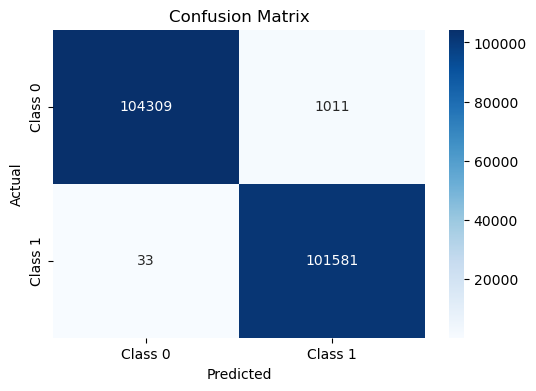

In [40]:
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


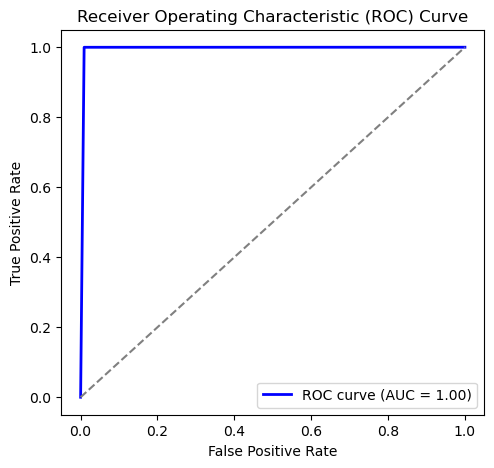

In [41]:
# Plot ROC Curve
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')

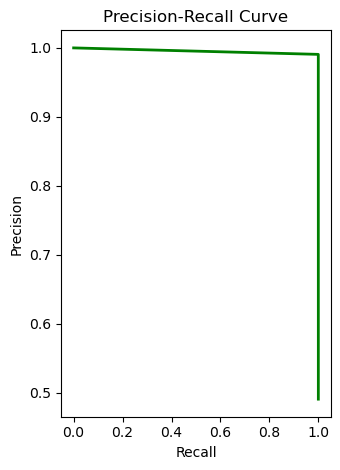

In [42]:
# Plot Precision-Recall Curve
plt.subplot(1, 2, 2)
plt.plot(recall, precision, color='green', lw=2)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')

plt.tight_layout()
plt.show()

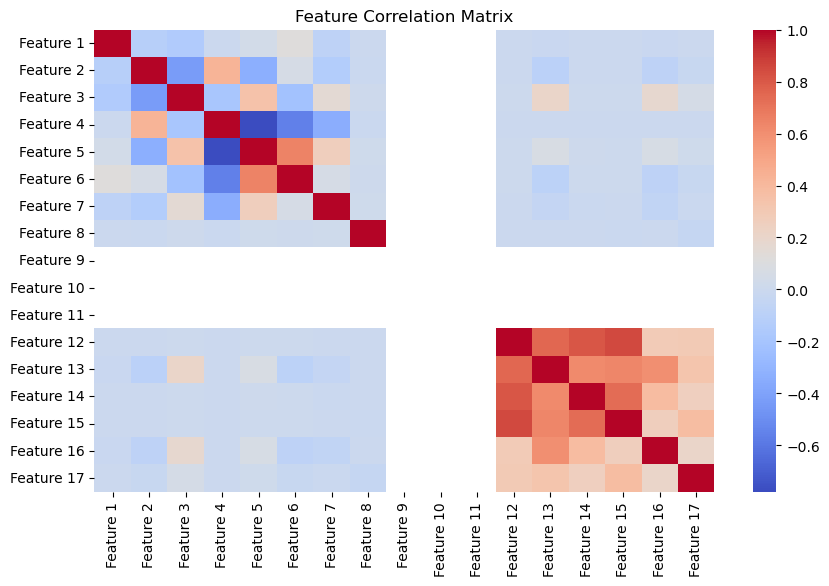

In [43]:
import seaborn as sns
import pandas as pd

# Convert numpy array back to dataframe for correlation analysis
df_features = pd.DataFrame(X_train, columns=[f'Feature {i+1}' for i in range(X_train.shape[1])])

# Compute correlation matrix
corr_matrix = df_features.corr()

# Plot Correlation Heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, cmap='coolwarm', annot=False)
plt.title('Feature Correlation Matrix')
plt.show()


In [44]:
!pip install pytorch-tabnet torch scikit-learn pandas numpy matplotlib seaborn


TabNet Model

In [45]:
import torch
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, auc, precision_recall_curve
from pytorch_tabnet.tab_model import TabNetClassifier


In [46]:
# Initialize TabNet Classifier
tabnet_model = TabNetClassifier(
    n_d=8, n_a=8,  # Feature embedding and attention sizes
    n_steps=3, gamma=1.5,
    optimizer_params=dict(lr=2e-2),
    scheduler_params={"step_size":10, "gamma":0.9},
    scheduler_fn=torch.optim.lr_scheduler.StepLR,
    mask_type="entmax"  # Alternatives: "sparsemax"
)


C:\Users\chawh\anaconda3\anaconda\Lib\site-packages\pytorch_tabnet\abstract_model.py:82: UserWarning: Device used : cpu
  warnings.warn(f"Device used : {self.device}")


In [47]:
# Train the model
tabnet_model.fit(
    X_train, y_train,
    eval_set=[(X_test, y_test)],
    max_epochs=10, patience=10,
    batch_size=128, virtual_batch_size=64,
    eval_metric=['accuracy']
)

epoch 0  | loss: 0.02142 | val_0_accuracy: 0.79669 |  0:02:08s
epoch 1  | loss: 0.01681 | val_0_accuracy: 0.50895 |  0:04:14s
epoch 2  | loss: 0.01669 | val_0_accuracy: 0.71085 |  0:12:10s
epoch 3  | loss: 0.0138  | val_0_accuracy: 0.50898 |  0:14:19s
epoch 4  | loss: 0.01336 | val_0_accuracy: 0.70618 |  0:16:28s
epoch 5  | loss: 0.02698 | val_0_accuracy: 0.50898 |  0:18:38s
epoch 6  | loss: 0.0111  | val_0_accuracy: 0.7967  |  0:20:47s
epoch 7  | loss: 0.01384 | val_0_accuracy: 0.79669 |  0:22:56s
epoch 8  | loss: 0.02581 | val_0_accuracy: 0.79671 |  0:25:05s
epoch 9  | loss: 0.01    | val_0_accuracy: 0.79669 |  0:27:13s
Stop training because you reached max_epochs = 10 with best_epoch = 8 and best_val_0_accuracy = 0.79671


C:\Users\chawh\anaconda3\anaconda\Lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)


In [54]:
# Get predictions
y_pred = tabnet_model.predict(X_test)

# Calculate Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"TabNet Model Accuracy: {accuracy:.4f}")

# Display Classification Report
print("Classification Report:\n", classification_report(y_test, y_pred))


TabNet Model Accuracy: 0.7967
Classification Report:
               precision    recall  f1-score   support

           0       0.71      1.00      0.83    105320
           1       1.00      0.59      0.74    101614

    accuracy                           0.80    206934
   macro avg       0.86      0.79      0.79    206934
weighted avg       0.85      0.80      0.79    206934



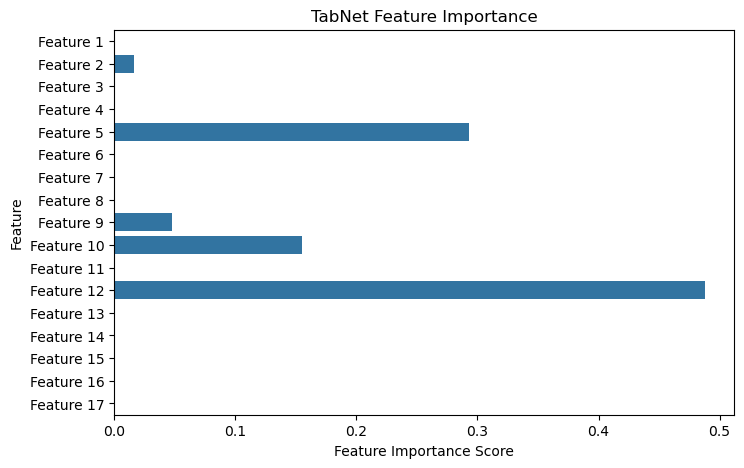

In [55]:
import matplotlib.pyplot as plt
import seaborn as sns

# Feature Importances from TabNet
feature_importance = tabnet_model.feature_importances_

# Plot Feature Importance
plt.figure(figsize=(8,5))
sns.barplot(x=feature_importance, y=[f'Feature {i+1}' for i in range(len(feature_importance))])
plt.xlabel("Feature Importance Score")
plt.ylabel("Feature")
plt.title("TabNet Feature Importance")
plt.show()


TabNet Model Accuracy: 0.7967
Classification Report:
               precision    recall  f1-score   support

           0       0.71      1.00      0.83    105320
           1       1.00      0.59      0.74    101614

    accuracy                           0.80    206934
   macro avg       0.86      0.79      0.79    206934
weighted avg       0.85      0.80      0.79    206934



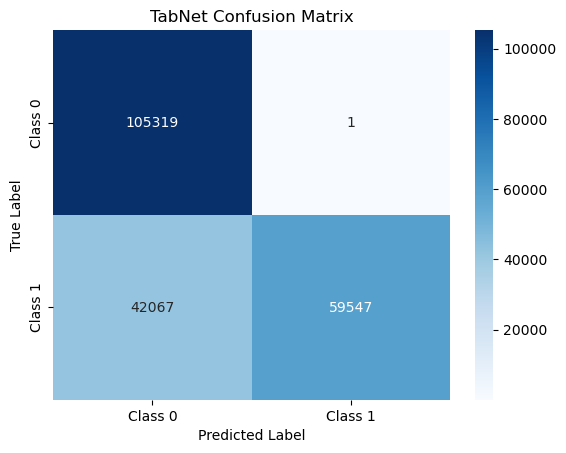

In [57]:
# Make Predictions
y_pred = tabnet_model.predict(X_test)

# Accuracy Score
accuracy = accuracy_score(y_test, y_pred)
print(f"TabNet Model Accuracy: {accuracy:.4f}")

# Classification Report
print("Classification Report:\n", classification_report(y_test, y_pred))

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=["Class 0", "Class 1"], yticklabels=["Class 0", "Class 1"])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("TabNet Confusion Matrix")
plt.show()


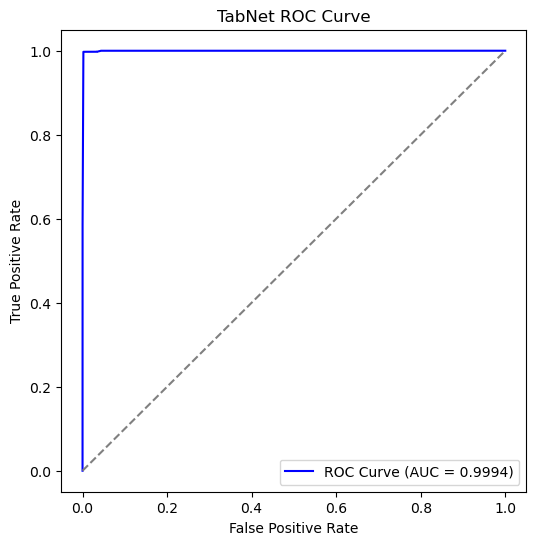

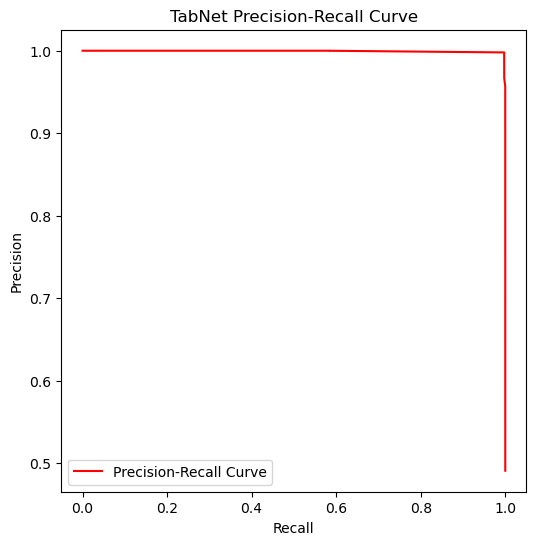

In [58]:
# Get probability scores
y_scores = tabnet_model.predict_proba(X_test)[:, 1]  # Probability for Class 1

# ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_scores)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6, 6))
plt.plot(fpr, tpr, color='blue', label=f"ROC Curve (AUC = {roc_auc:.4f})")
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("TabNet ROC Curve")
plt.legend()
plt.show()

# Precision-Recall Curve
precision, recall, _ = precision_recall_curve(y_test, y_scores)

plt.figure(figsize=(6, 6))
plt.plot(recall, precision, color='red', label="Precision-Recall Curve")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("TabNet Precision-Recall Curve")
plt.legend()
plt.show()
